In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catvsdog/CatvsDog/test/dog/1269.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/2193.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/2008.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/2081.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1786.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1075.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1789.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/473.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1411.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1501.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1385.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/333.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/369.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/56.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/654.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1711.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1940.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/212.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/2057.jpg
/kaggle/input/catvsdog/CatvsDog/test/dog/1009.jpg
/kaggle

In [2]:
import os

# Check the structure of the 'train' folder
train_dir = '/kaggle/input/catvsdog/CatvsDog/train'
print("Train directory contents:", os.listdir(train_dir))

# Check the structure of the 'test' folder
test_dir = '/kaggle/input/catvsdog/CatvsDog/test'
print("Test directory contents:", os.listdir(test_dir))


Train directory contents: ['dog', 'cat']
Test directory contents: ['dog', 'cat']


In [5]:
import os

# Paths to train and test directories
train_dir = '/kaggle/input/catvsdog/CatvsDog/train'
test_dir = '/kaggle/input/catvsdog/CatvsDog/test'

def count_images_in_folder(folder_path):
    # Dictionary to store counts for each subfolder
    image_counts = {}
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            # Count all files in the subfolder
            image_counts[subfolder] = len([
                f for f in os.listdir(subfolder_path)
                if os.path.isfile(os.path.join(subfolder_path, f))
            ])
    return image_counts

# Count images in train and test directories
train_image_counts = count_images_in_folder(train_dir)
test_image_counts = count_images_in_folder(test_dir)

print("Train Image Counts:", train_image_counts)
print("Test Image Counts:", test_image_counts)


Train Image Counts: {'dog': 5026, 'cat': 12500}
Test Image Counts: {'dog': 1071, 'cat': 1219}


In [9]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_from_csv(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Check if required columns exist
    required_columns = {"Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"}
    if not required_columns.issubset(data.columns):
        print(f"CSV file must contain the columns: {required_columns}")
        return

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data['Epoch'], data['Train Accuracy'], label='Train Accuracy', marker='o')
    plt.plot(data['Epoch'], data['Val Accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(data['Epoch'], data['Train Loss'], label='Train Loss', marker='o')
    plt.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

In [30]:
import numpy as np
import pandas as pd


# Define the test harness
def run_test_harness():
    model = define_model()

    # Data augmentation configuration
    datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        rotation_range=20,      
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        shear_range=0.15,       
        zoom_range=0.15,        
        horizontal_flip=True,   
        fill_mode='nearest'    
    )

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        '/kaggle/input/catvsdog/CatvsDog/train',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # For testing, no augmentation is applied, only rescaling
    test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    test_it = test_datagen.flow_from_directory(
        '/kaggle/input/catvsdog/CatvsDog/test',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=10,
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(10):  # Assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 11),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)


In [31]:
run_test_harness()

Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.
Epoch 1/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 191s 332ms/step - accuracy: 0.6839 - loss: 0.8856 - val_accuracy: 0.5323 - val_loss: 0.6992
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 183s 329ms/step - accuracy: 0.7185 - loss: 0.5873 - val_accuracy: 0.5323 - val_loss: 0.6714
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 183s 330ms/step - accuracy: 0.7096 - loss: 0.5679 - val_accuracy: 0.5760 - val_loss: 0.6668
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 281s 509ms/step - accuracy: 0.7379 - loss: 0.5387 - val_accuracy: 0.6773 - val_loss: 0.6067
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 260s 468ms/step - accuracy: 0.7406 - loss: 0.5252 - val_accuracy: 0.6703 - val_loss: 0.6033
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 169s 305ms/step - accuracy: 0.7589 - loss: 0.5133 - val_accuracy: 0.6991 - val_loss: 0.5735
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 172s 309ms/step - accuracy: 0.7652 - loss: 0.5021 - val_accuracy: 0.7109 - val_loss

In [32]:
import numpy as np
import pandas as pd


# Define the test harness
def run_test_harness():
    model = define_model()

    # Data augmentation configuration
    datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True  
    )

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        '/kaggle/input/catvsdog/CatvsDog/train',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # For testing, no augmentation is applied, only rescaling
    test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    test_it = test_datagen.flow_from_directory(
        '/kaggle/input/catvsdog/CatvsDog/test',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=10,
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(10):  # Assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 11),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)


In [33]:
run_test_harness()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


548/548 ━━━━━━━━━━━━━━━━━━━━ 177s 308ms/step - accuracy: 0.6780 - loss: 0.8582 - val_accuracy: 0.5323 - val_loss: 0.6951
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 168s 302ms/step - accuracy: 0.7115 - loss: 0.5881 - val_accuracy: 0.6013 - val_loss: 0.6602
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 170s 307ms/step - accuracy: 0.7301 - loss: 0.5597 - val_accuracy: 0.6598 - val_loss: 0.6116
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 174s 314ms/step - accuracy: 0.7635 - loss: 0.5160 - val_accuracy: 0.6978 - val_loss: 0.5795
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 171s 307ms/step - accuracy: 0.7771 - loss: 0.4883 - val_accuracy: 0.7109 - val_loss: 0.5617
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 170s 306ms/step - accuracy: 0.7793 - loss: 0.4798 - val_accuracy: 0.7218 - val_loss: 0.5507
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 168s 302ms/step - accuracy: 0.7866 - loss: 0.4655 - val_accuracy: 0.7424 - val_loss: 0.5349
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 167s 300ms/step - accuracy: 0.7950 - loss: 0.45

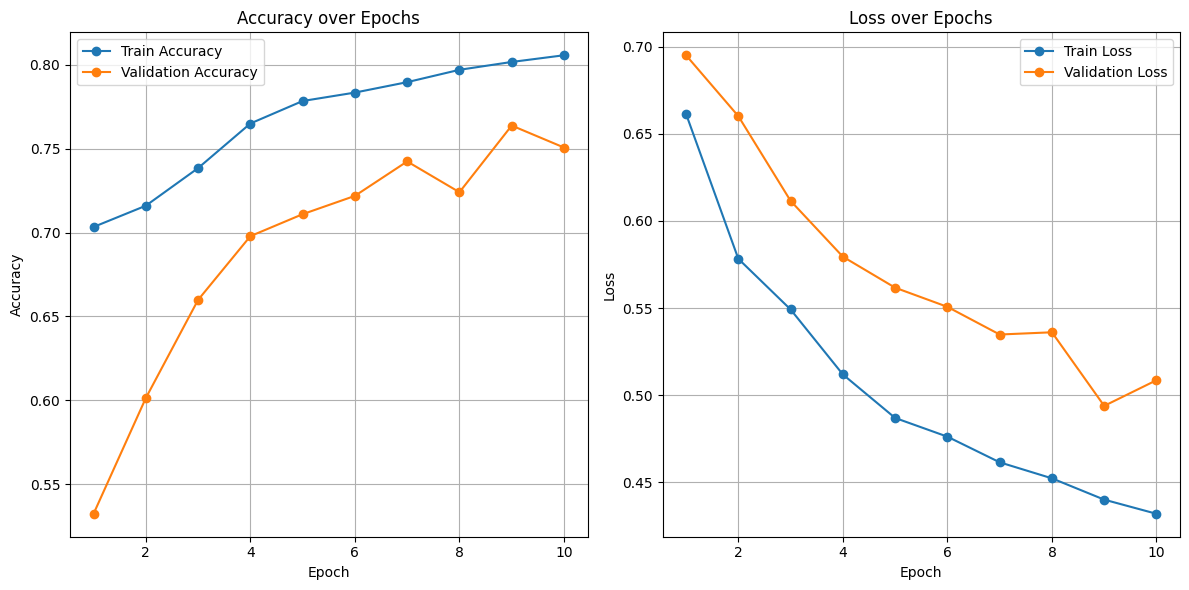

In [34]:
plot_from_csv('training_history.csv')

In [35]:
from keras.layers import BatchNormalization

In [36]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [37]:
import numpy as np
import pandas as pd


# Define the test harness
def run_test_harness():
    model = define_model()

    # Data augmentation configuration
    datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True  
    )

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        '/kaggle/input/catvsdog/CatvsDog/train',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # For testing, no augmentation is applied, only rescaling
    test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    test_it = test_datagen.flow_from_directory(
        '/kaggle/input/catvsdog/CatvsDog/test',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=10,
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(10):  # Assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 11),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)

In [38]:
run_test_harness()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


548/548 ━━━━━━━━━━━━━━━━━━━━ 181s 311ms/step - accuracy: 0.6907 - loss: 0.7367 - val_accuracy: 0.5349 - val_loss: 0.6906
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 169s 304ms/step - accuracy: 0.7160 - loss: 0.5299 - val_accuracy: 0.5345 - val_loss: 0.6671
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 168s 303ms/step - accuracy: 0.7461 - loss: 0.5070 - val_accuracy: 0.7445 - val_loss: 0.5963
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 168s 303ms/step - accuracy: 0.7874 - loss: 0.4813 - val_accuracy: 0.7162 - val_loss: 0.6488
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 167s 300ms/step - accuracy: 0.7887 - loss: 0.4783 - val_accuracy: 0.7520 - val_loss: 0.5789
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 168s 303ms/step - accuracy: 0.8077 - loss: 0.4488 - val_accuracy: 0.7742 - val_loss: 0.5701
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 167s 301ms/step - accuracy: 0.8094 - loss: 0.4415 - val_accuracy: 0.7406 - val_loss: 0.6114
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 166s 299ms/step - accuracy: 0.8207 - loss: 0.43